Lambda School Data Science

*Unit 2, Sprint 2, Module 1*

---

# Decision Trees

## Assignment
- [x] [Sign up for a Kaggle account](https://www.kaggle.com/), if you don’t already have one. Go to our Kaggle InClass competition website. You will be given the URL in Slack. Go to the Rules page. Accept the rules of the competition. Notice that the Rules page also has instructions for the Submission process. The Data page has feature definitions.
- [x] Do train/validate/test split with the Tanzania Waterpumps data.
- [x] Begin with baselines for classification.
- [x] Select features. Use a scikit-learn pipeline to encode categoricals, impute missing values, and fit a decision tree classifier.
- [x] Get your validation accuracy score.
- [x] Get and plot your feature importances.
- [x] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [x] Commit your notebook to your fork of the GitHub repo.


## Stretch Goals

### Reading

- A Visual Introduction to Machine Learning
  - [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)
  - [Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU) — _Don’t worry about understanding the code, just get introduced to the concepts. This 10 minute video has excellent diagrams and explanations._
- [Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)


### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features. (For example, [what columns have zeros and shouldn't?](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values) What columns are duplicates, or nearly duplicates? Can you extract the year from date_recorded? Can you engineer new features, such as the number of years from waterpump construction to waterpump inspection?)
- [ ] Try other [scikit-learn imputers](https://scikit-learn.org/stable/modules/impute.html).
- [ ] Make exploratory visualizations and share on Slack.


#### Exploratory visualizations

Visualize the relationships between feature(s) and target. I recommend you do this with your training set, after splitting your data. 

For this problem, you may want to create a new column to represent the target as a number, 0 or 1. For example:

```python
train['functional'] = (train['status_group']=='functional').astype(int)
```



You can try [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html) for features with reasonably few unique values. (With too many unique values, the plot is unreadable.)

- Categorical features. (If there are too many unique values, you can replace less frequent values with "OTHER.")
- Numeric features. (If there are too many unique values, you can [bin with pandas cut / qcut functions](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html?highlight=qcut#discretization-and-quantiling).)

You can try [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html) with numeric features. For this classification problem, you may want to use the parameter `logistic=True`, but it can be slow.

You do _not_ need to use Seaborn, but it's nice because it includes confidence intervals to visualize uncertainty.

#### High-cardinality categoricals

This code from a previous assignment demonstrates how to replace less frequent values with 'OTHER'

```python
# Reduce cardinality for NEIGHBORHOOD feature ...

# Get a list of the top 10 neighborhoods
top10 = train['NEIGHBORHOOD'].value_counts()[:10].index

# At locations where the neighborhood is NOT in the top 10,
# replace the neighborhood with 'OTHER'
train.loc[~train['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
test.loc[~test['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
```


In [1]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

In [8]:
# Pandas Profiling can be very slow with medium & large datasets.
# These parameters will make it faster.
# https://github.com/pandas-profiling/pandas-profiling/issues/222

# import pandas_profiling

# profile_report = train.profile_report(
#     #check_correlation_pearson=False,
#     correlations={
#         'pearson': False,
#         'spearman': False,
#         'kendall': False,
#         'phi_k': False,
#         'cramers': False,
#         'recoded': False,
#     },
#     plot={'histogram': {'bayesian_blocks_bins': False}},
# )

#profile_report

In [10]:
train.describe(include='object')

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
count,59400,55765,55745,59400,59400,59029,59400,59400,59400,56066,...,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,356,1897,2145,37400,9,19287,21,125,2092,2,...,8,6,5,5,10,7,3,7,6,3
top,2011-03-15,Government Of Tanzania,DWE,none,Lake Victoria,Madukani,Iringa,Njombe,Igosi,True,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
freq,572,9084,17402,3563,10248,508,5294,2503,307,51011,...,50818,50818,33186,33186,17021,17021,45794,28522,34625,32259


In [11]:
#Divide train data into train/validation 

from sklearn.model_selection import train_test_split

train, val = train_test_split(train, train_size=0.8)

In [72]:
train.shape, val.shape

((47520, 40), (11880, 40))

In [71]:
import numpy as np

def wrangle(X):
    """Define function to wrangle test, train, validate data in the same way """
    #Prevent from SettingWithCopyWarning 
    X=X.copy()
    
    #Replace latitude near 0 outside of Tanzania -- treat like zeros
    X['latitude']=X['latitude'].replace(-2e-08, 0)
    
    #When columns have zeros -- that's missing values, replace with np.nan
    cols_with_zeros=['longitude', 'latitude', 'construction_year']
    for col in cols_with_zeros:
        X[col]=X[col].replace(0,np.nan)
        
    #quanity and quantity_group are dupes, drop one: 
    X=X.drop(columns='quantity_group')
    
    #return wrangled df
    
    return X

train=wrangle(train)
val=wrangle(val)
test=wrangle(test)





In [73]:
#select features

#Get features with cardinality of non-numeric features

non_numeric=train.select_dtypes(include='object').nunique()
to_exclude=non_numeric[non_numeric>50].index.to_list
to_exclude


<bound method IndexOpsMixin.tolist of Index(['date_recorded', 'funder', 'installer', 'wpt_name', 'subvillage', 'lga',
       'ward', 'scheme_name'],
      dtype='object')>

In [74]:
target = 'status_group'
features = train.columns.drop(['id',target,'date_recorded', 'funder', 'installer', 'wpt_name', 'subvillage', 'lga',
       'ward', 'scheme_name'])

X_train = train[features]
X_val = val[features]
y_train= train[target]
y_val = val[target]

X_test= test[features]

X_train.shape, X_val.shape

((47520, 30), (11880, 30))

In [75]:
#Calculate Test baseline: 
from sklearn.metrics import accuracy_score

majority_class=y_train.mode()[0]

y_pred=[majority_class] * len(y_val)
accuracy_val = accuracy_score(y_pred, y_val)

print(f'Majority class baseline is {majority_class}, and its accuracy is {accuracy_val:.4f}')

Majority class baseline is functional, and its accuracy is 0.5510


#Now let's create a model to beat this accuracy

Select features. Use a scikit-learn pipeline to encode categoricals, impute missing values, and fit a decision tree classifier.


In [80]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipeline = make_pipeline(

    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    LogisticRegression(multi_class='auto', solver='lbfgs',n_jobs=1)

)

#Fit on train 
pipeline.fit(X_train, y_train)

#Score on val 
print('Validation accuracy', pipeline.score(X_val,y_val))

#Predict on test 
y_pred=pipeline.predict(X_test)


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.



Validation accuracy 0.7392255892255892


In [81]:
#Replace with the decision tree: 


from sklearn.tree import DecisionTreeClassifier


pipeline=make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean'),
    DecisionTreeClassifier(random_state=42)

)


#Fit on train: 
pipeline.fit(X_train, y_train)

##Accuracy score on val 

print('Train Accuracy', pipeline.score(X_train, y_train))
print('Validation Accuracy', pipeline.score(X_val, y_val))

#Predict on test 
y_pred=pipeline.predict(X_test)

Train Accuracy 0.9954335016835016
Validation Accuracy 0.7506734006734007


In [83]:
#Reduce complexity 

pipeline=make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean'),
    DecisionTreeClassifier(random_state=42, min_samples_leaf=20)

)


#Fit on train: 
pipeline.fit(X_train, y_train)

##Accuracy score on val 

print('Train Accuracy', pipeline.score(X_train, y_train))
print('Validation Accuracy', pipeline.score(X_val, y_val))




Train Accuracy 0.8084806397306398
Validation Accuracy 0.7679292929292929


In [99]:
#Or, decrease the depth 

#Reduce complexity 

pipeline=make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean'),
    DecisionTreeClassifier(random_state=42, max_depth=17)

)


#Fit on train: 
pipeline.fit(X_train, y_train)

##Accuracy score on val 

print('Train Accuracy', pipeline.score(X_train, y_train))
print('Validation Accuracy', pipeline.score(X_val, y_val))


y_pred=pipeline.predict(X_test)




Train Accuracy 0.8664983164983165
Validation Accuracy 0.7713804713804714


array(['functional', 'functional', 'functional needs repair', ...,
       'functional', 'functional', 'non functional'], dtype=object)

In [143]:
result=pd.Series(pipeline.predict(X_test))
result=pd.concat([test['id'], result], axis=1)
result.columns=['id','status_group']
result
result.to_csv(path_or_buf='kaggle.csv',index=False)

In [145]:
type(result)

pandas.core.frame.DataFrame

In [144]:
result

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional needs repair
3,45559,non functional
4,49871,functional
...,...,...
14353,39307,non functional
14354,18990,functional
14355,28749,functional
14356,33492,functional


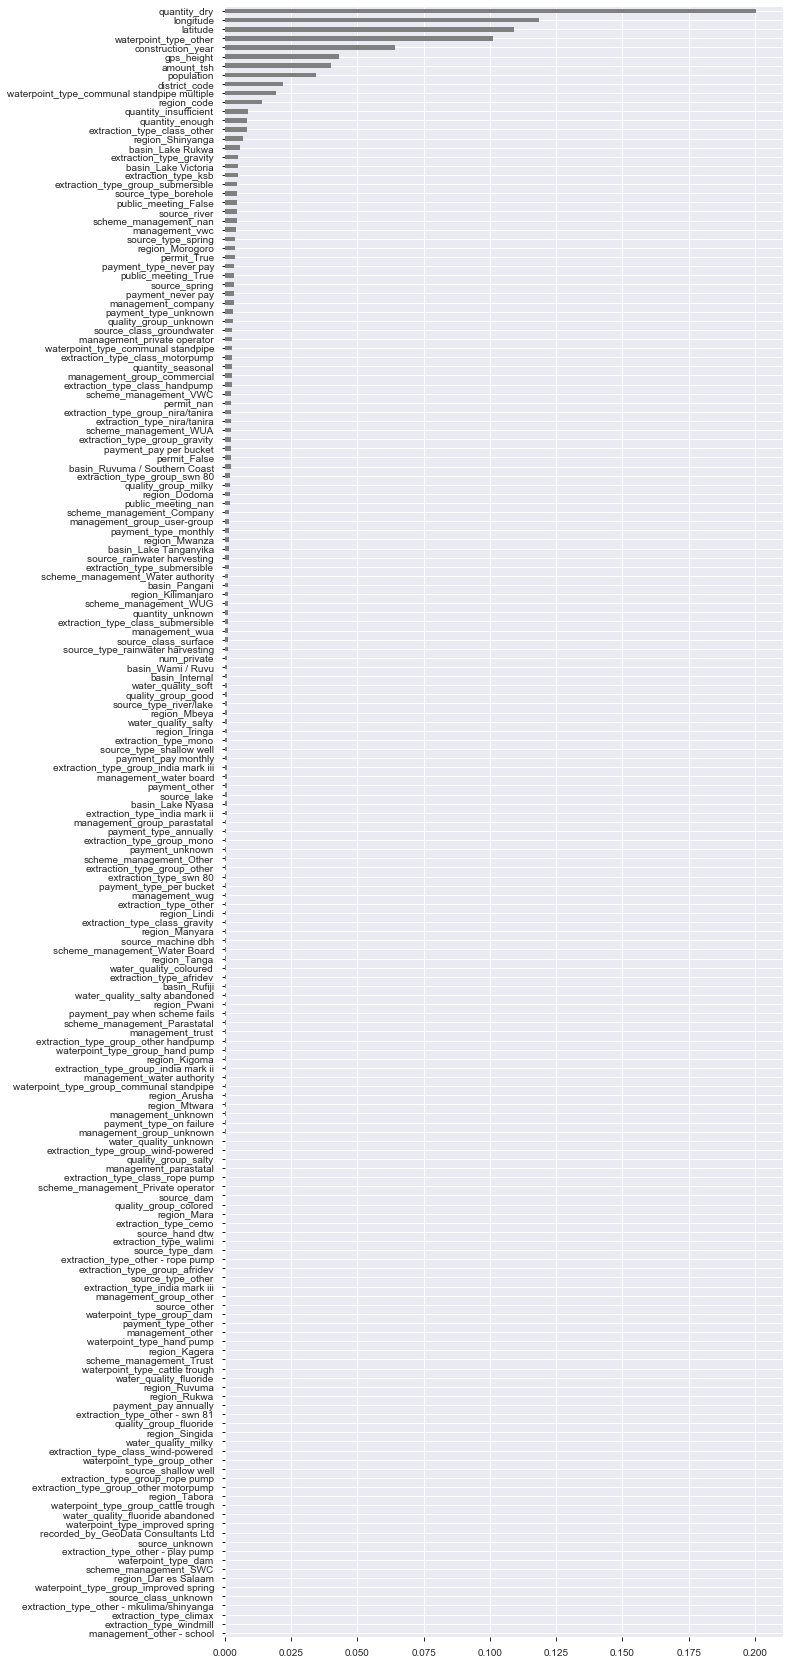

In [98]:
#Get and plot your feature importances.

import matplotlib.pyplot as plt

model=pipeline.named_steps['decisiontreeclassifier']

encoder=pipeline.named_steps['onehotencoder']
encoded_columns=encoder.transform(X_val).columns
importances=pd.Series(model.feature_importances_, encoded_columns)

plt.figure(figsize=(10,30))
importances.sort_values().plot.barh(color='gray')
